In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("drive/MyDrive/Colab_Notebooks/dataset.csv")

In [ ]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
df.shape[0]

55702

In [ ]:
print(df.isnull().sum().sum())

12


  **-Quelles sont les différentes colonnes du jeu de données**
Nous avons plusieurs caracteristiques telles que l'age, le genre, la taille, le tour de taille, la vision, l'audition...
  **-Combien y-a-t'il d'entrées dans le jeu de données ?**
Il y a 55702 entrées dans le jeu de données
  **-Le jeu de données contient-il des valeures nulles ? SI oui combien?**
Il y a 12 valeures nulles dans le dataset







In [ ]:
print(df['age'].mean())

44.97656923297903


In [ ]:
print(df['height(cm)'].mean())

164.6486661161179


In [ ]:
print(df['weight(kg)'].mean())

65.86424518816432


<Axes: ylabel='age'>

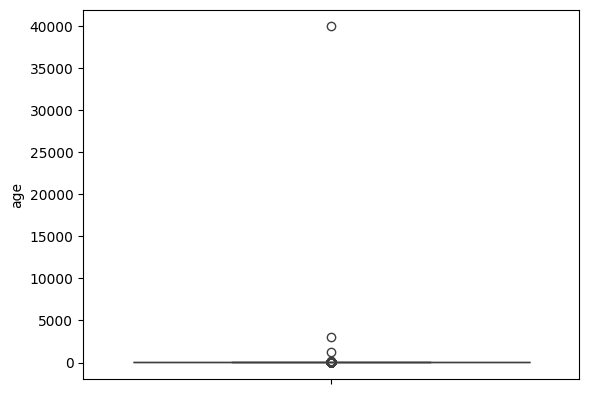

In [ ]:
sns.boxplot(df['age'])

In [ ]:
print(np.where(df['age']>100))

(array([55692, 55693, 55694, 55695]),)


In [ ]:
print(df['hemoglobin'].std())

1.5644757507736968


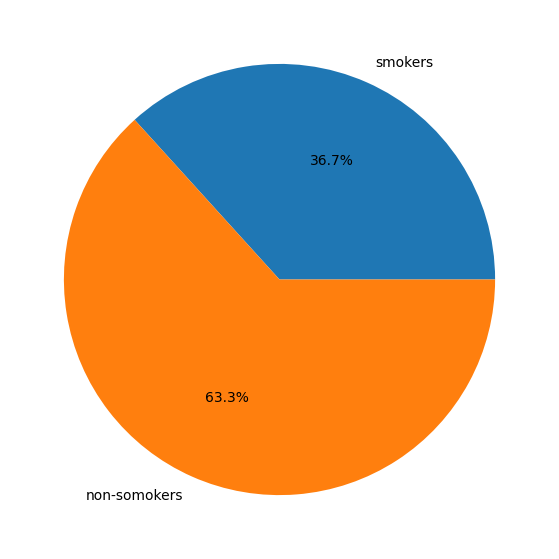

In [ ]:
countS=0
countNS=0
for value in df['smoking']:
  if(value==1):
    countS+=1
  else:
    countNS+=1

data=[countS, countNS]
mylabels=['smokers', 'non-somokers']
fig =plt.figure(figsize=(10, 7))
plt.pie(data, labels=mylabels, autopct='%1.1f%%')
plt.show()

In [ ]:
valueMS=df[(df.smoking ==1) & (df.gender=='M')].shape[0]
valueFS=df[(df.smoking ==1) & (df.gender=='F')].shape[0]
print('Homme :', valueMS)
print('Femme :', valueFS)

Homme : 19598
Femme : 859


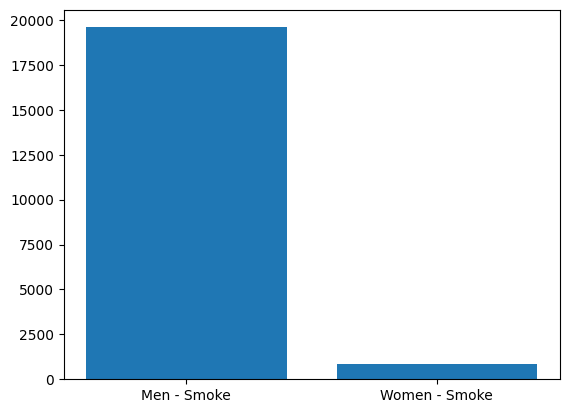

In [ ]:
categorie=['Men - Smoke', 'Women - Smoke']
val=[valueMS, valueFS]
plt.bar(categorie, val)
plt.show()

In [ ]:
valuemoy=df[(df.smoking ==1) & (df.gender=='M')]['age'].mean()
print('Homme :', valuemoy)

Homme : 43.437005664132265


In [ ]:
corr_df =df.corr(method="pearson")

plt.matshow(corr_df)
plt.show()

ValueError: could not convert string to float: 'F'

Nous avons des strings et des integers dans notre Dataframe

In [ ]:
df = df.dropna(axis = 0, how = 'any')

In [ ]:
print(df.isnull().sum().sum())

0


Pour gérer les valeurs manquantes nous allons supprimer les lignes ayant des valeurs manquantes. Les resultats seront alors plus fiables.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one_hot_encod = pd.get_dummies(df['gender'])
one_hot_encod = pd.get_dummies(df['tartar'])
one_hot_encod = pd.get_dummies(df['oral'])

In [ ]:
col=['gender', 'tartar','oral']
encod=OneHotEncoder(sparse=False)
col_en=encod.fit_transform(df[col])
df_enco=pd.DataFrame(col_en, columns= encod.get_feature_names_out(col))
df_encoded = pd.concat([df.drop(col, axis=1),df_enco],axis=1)
print(df_encoded)

          ID      age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0     40.0         155        60.0       81.3             1.2   
1          1     40.0         160        60.0       81.0             0.8   
2          2     55.0         170        60.0       80.0             0.8   
3          3     40.0         165        70.0       88.0             1.5   
4          4     40.0         155        60.0       86.0             1.0   
...      ...      ...         ...         ...        ...             ...   
55691  55691     55.0         160        65.0       85.0             0.9   
55692  55681    180.0         160        50.0       70.0             1.2   
55693  55683   1200.0         160        50.0       68.5             1.0   
55694  55684   3000.0         165        60.0       78.0             0.8   
55695  55691  40000.0         160        65.0       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...   AST  \
0        

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


On peut utiliser la standardisation ainsi que le kurtosis et skewness


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_encoded.drop('smoking', axis=1)
y = df_encoded['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Test --> 20%
Train --> 80%

On évite le over et under fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print(f"ACC: {accuracy}")
print(y_pred)

[0 0 0 ... 0 0 0]


On remarque que toutes les valeurs sont à 0, ce n'est pas logique

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC()
}
params = {
    'DecisionTree': {'max_depth': [3, 5, 7, 10]},
    'KNN': {'n_neighbors': [3, 5, 7, 10]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}
best_models = {}
for model_name in models:
    grid = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")

Best parameters for DecisionTree: {'max_depth': 7}
Best parameters for KNN: {'n_neighbors': 10}
Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 200}


arbre de décision -> max_depth
KNN -> n_neighbors.
Random Forest -> n_estimators et max_depth.
SVM ->C et kernel.


L'ajustement des hyperparamètres permet de prendre les paramètres avec le plus de poids et les selectionne pour obtenir la meilleure combinaison afin d'avoir le meilleur modèle afin d'ameliorer les performances

In [ ]:
from sklearn.metrics import f1_score

# Évaluation de chaque modèle sur le jeu de test
performances = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    performances[model_name] = {'accuracy': accuracy, 'f1_score': f1}
    print(f"{model_name} - Accuracy: {accuracy}, F1 Score: {f1}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

1/ On calcule le score F1 afin de determiner la performance des modèles

2/ Le meilleur modèle est celui avec le score F1 le plus élevé.